<a href="https://colab.research.google.com/github/felipenufisnor/ds-python-seaborn/blob/main/EDA_tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Base de Dados

In [258]:
import pandas as pd

In [259]:
pd.read_csv('tips_atualizado.csv')

,total_bill,tip,dessert,day,time,size
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


In [260]:
dados = pd.read_csv('tips.csv')

In [261]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [262]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [263]:
renomear = {
    'total_bill': 'valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa' , 
    'day': 'dia_da_semana', 
    'time': 'hora_do_dia', 
    'size': 'total_de_pessoas'
}

In [264]:
type(dados)

pandas.core.frame.DataFrame

In [265]:
gorjetas = dados.rename(columns = renomear)

In [266]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [267]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [268]:
sim_nao = {
    'No': 'Não',
    'Yes': 'Sim'
}

In [269]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [270]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [271]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [272]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [273]:
dias = {
    'Sun': 'Domingo', 
    'Sat': 'Sábado', 
    'Thur': 'Quinta', 
    'Fri': 'Sexta'
}

In [274]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [275]:
gorjetas.dia_da_semana

0      Domingo
1      Domingo
2      Domingo
3      Domingo
4      Domingo
        ...   
239     Sábado
240     Sábado
241     Sábado
242     Sábado
243     Quinta
Name: dia_da_semana, Length: 244, dtype: object

In [276]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [277]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [278]:
hora = {
    'Dinner': 'Jantar', 
    'Lunch': 'Almoço'
}

In [279]:
hora

{'Dinner': 'Jantar', 'Lunch': 'Almoço'}

In [280]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [281]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Importando o Seaborn

In [282]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [283]:
import seaborn as sns

In [284]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.8/dist-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: missingno


# Análise I - Valor da Conta e Gorjeta

In [285]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

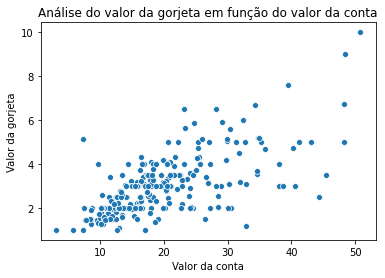

In [286]:
primeiro_plot = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)
primeiro_plot.set_title('Análise do valor da gorjeta em função do valor da conta')
primeiro_plot.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')
primeiro_plot

* Visualmente, o valor da gorjeta cresce conforme o valor da conta aumenta.


In [287]:
imagem = primeiro_plot.get_figure()
imagem.savefig('imagem.jpeg')

In [288]:
gorjetas.shape[0]

244

In [289]:
print('A base de dados contém {} registros.\n'.format(gorjetas.shape[0]))
print('Registros não nulos {}.\n'.format(gorjetas.count()))

A base de dados contém 244 registros.

Registros não nulos valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64.



## Criando o campo porcentagem

In [290]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [291]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [292]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [293]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

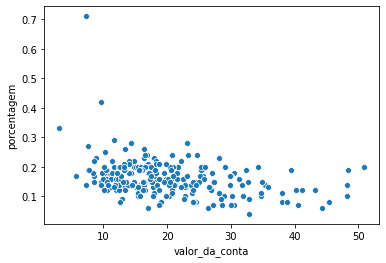

In [294]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data = gorjetas)

*Visualmente, o valor da conta não é proporcional ao valor da gorjeta.

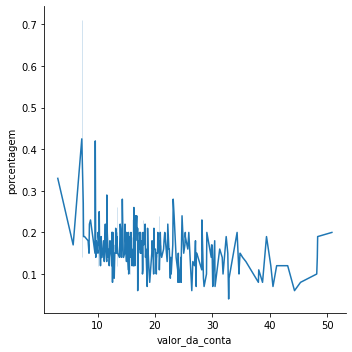

In [295]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind = 'line', data = gorjetas)

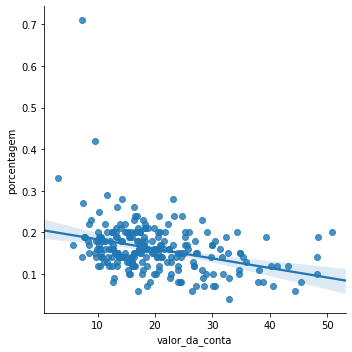

In [296]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data = gorjetas)

*Visualmente, o valor da conta diminui, enquanto a porcentagem da gorjeta se mantém estável.



In [297]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


# Análise II - Sobremesa

In [298]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [299]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


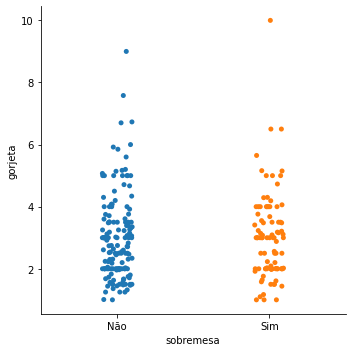

In [300]:
sns.catplot(x='sobremesa', y='gorjeta', data = gorjetas)

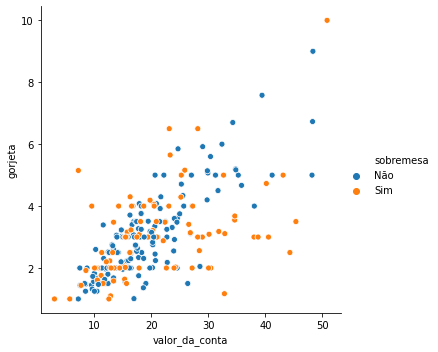

In [301]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data = gorjetas)

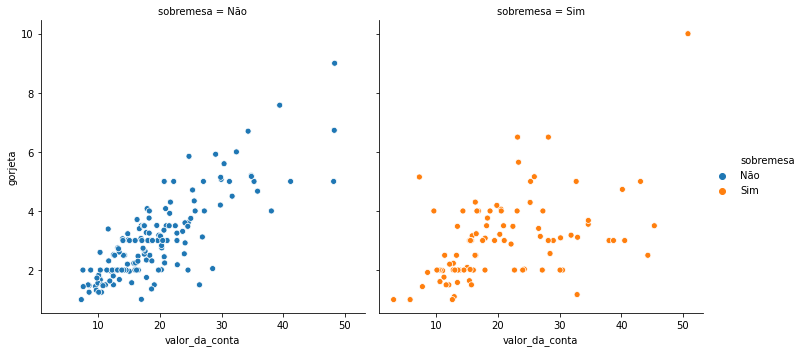

In [302]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data = gorjetas)

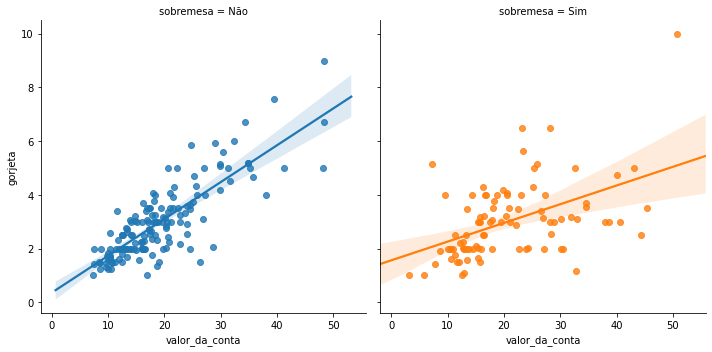

In [303]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data = gorjetas)

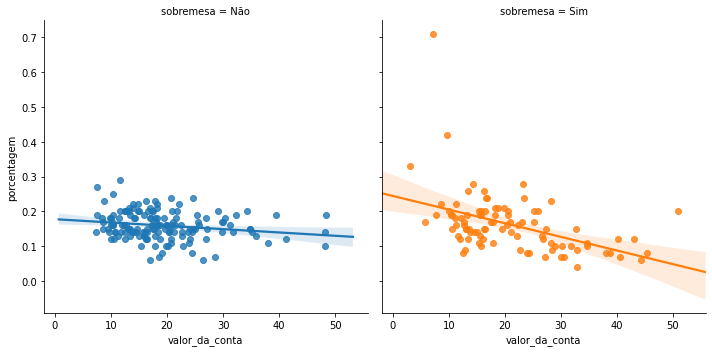

In [304]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data = gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

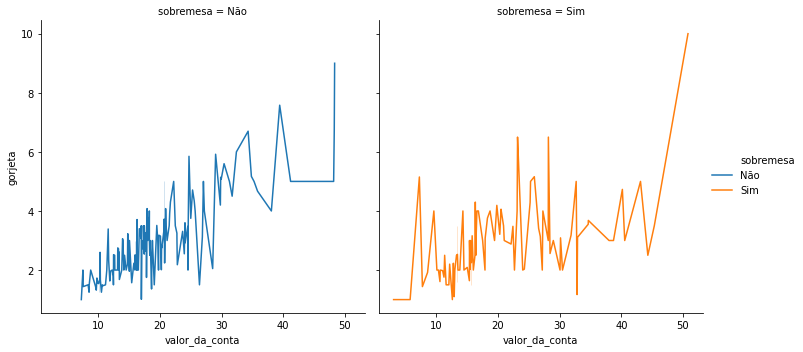

In [305]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data = gorjetas)

# Teste de Hipótese

**H<sup>null</sup>**
>**a distribuição da taxa de gorjeta é a mesma nos dois grupos.**

**H<sup>alt</sup>**
>**a distribuição da taxa de gorjeta não é a mesma nos dois grupos.**

In [306]:
from scipy.stats import ranksums

In [307]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [308]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [309]:
r = ranksums(sobremesa, sem_sobremesa)

In [310]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**
>**a distribuição da taxa de gorjeta é a mesma nos dois grupos.**

# Análise III - Dias da Semana

In [311]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [312]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

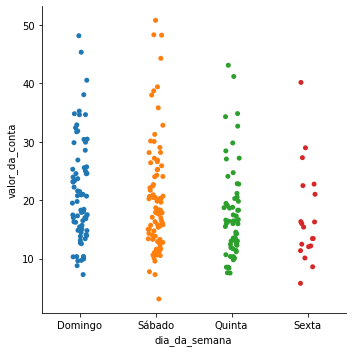

In [313]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

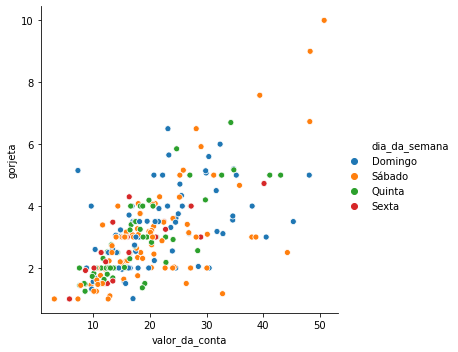

In [314]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

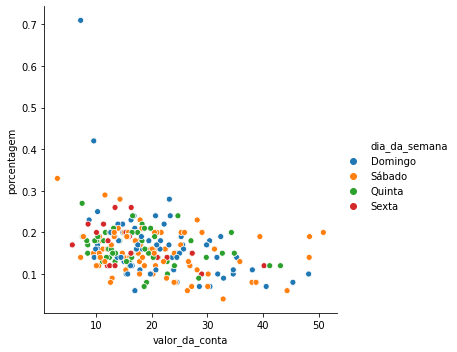

In [315]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

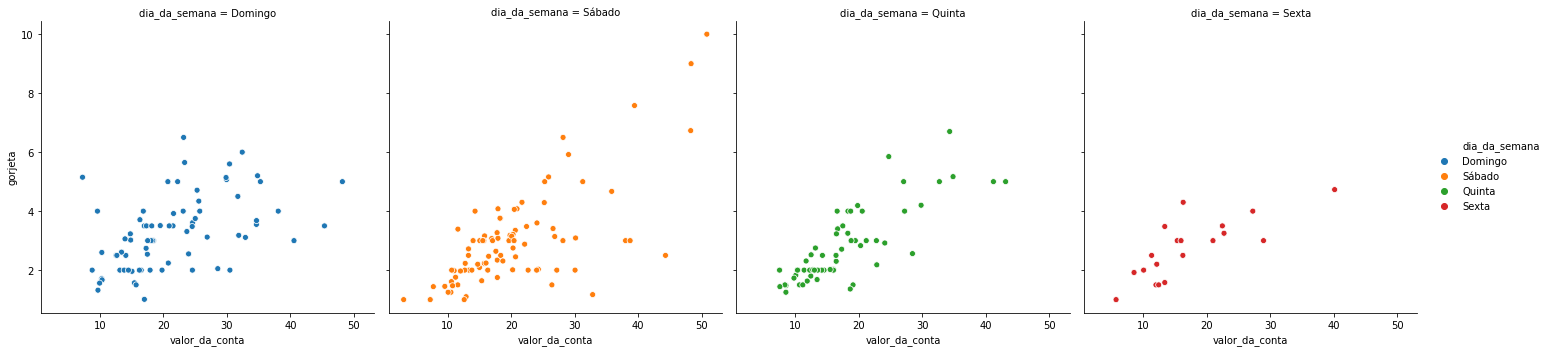

In [316]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

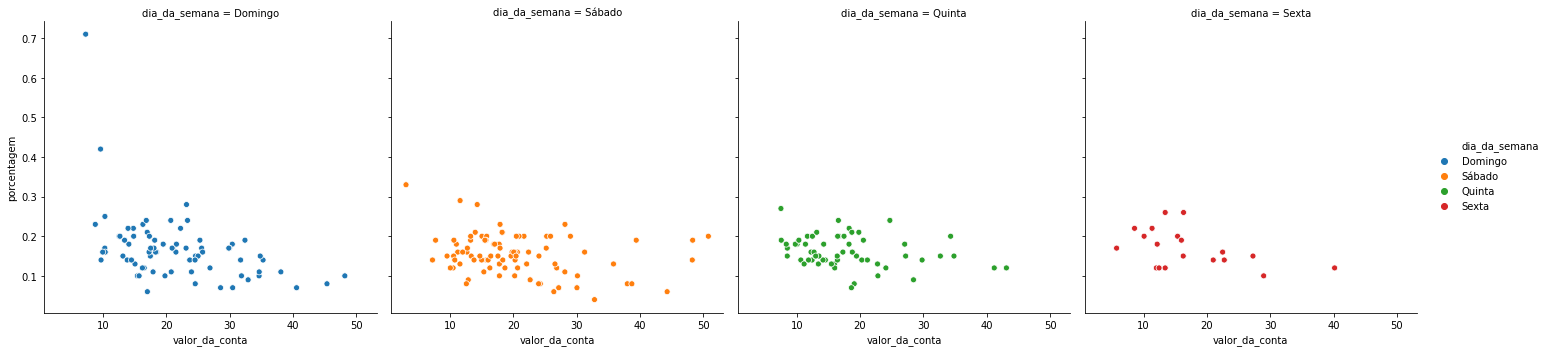

In [317]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

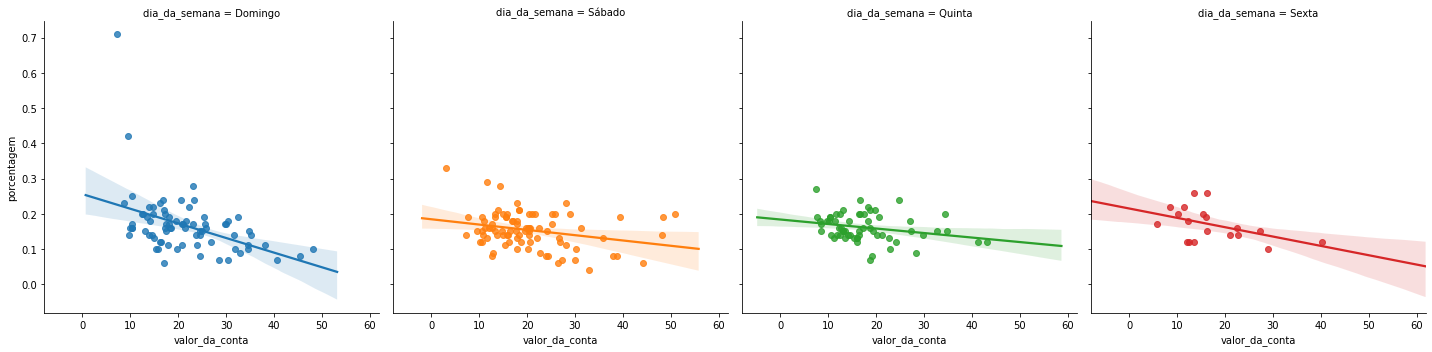

In [318]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [319]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [320]:
print('A média geral das gorjetas é {}.'.format(media_geral_gorjetas))

A média geral das gorjetas é 2.99827868852459.


In [321]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [322]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de Hipótese

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo.**

**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no sábado e no domingo.**

In [323]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [324]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [325]:
valor_conta_domingo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: valor_da_conta, Length: 76, dtype: float64

In [326]:
valor_conta_sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_da_conta, Length: 87, dtype: float64

In [327]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo.**

In [328]:
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


# Análise VI - Hora do dia

In [329]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [330]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

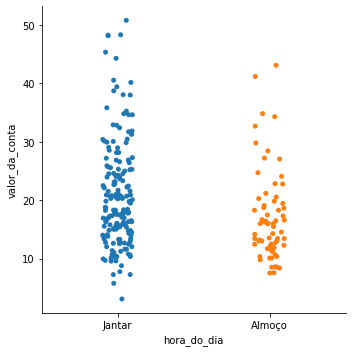

In [331]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

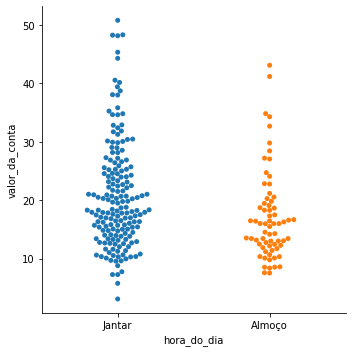

In [332]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

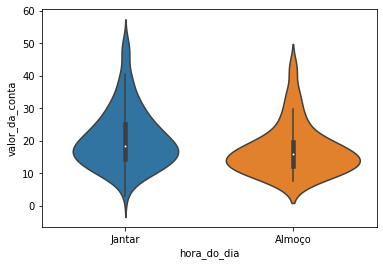

In [333]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

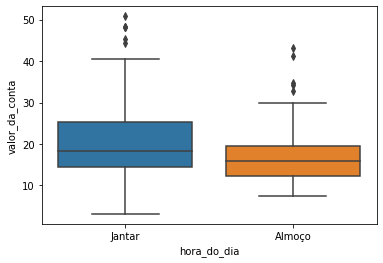

In [334]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [335]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

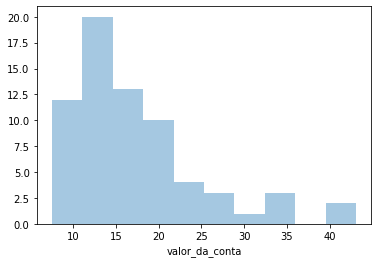

In [336]:
sns.distplot(almoco, kde=False)

In [337]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

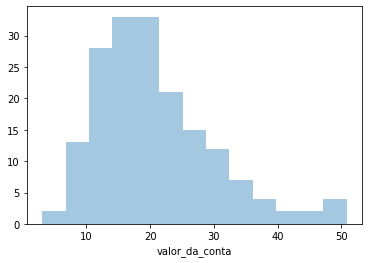

In [338]:
sns.distplot(jantar, kde=False)

In [339]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de Hipótese

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no jantar e no almoço.**

**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no jantar e no almoço.**

In [340]:
r3 = ranksums(jantar, almoco)
r3

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

In [341]:
print('O valor do p-value é {}.'.format(r3.pvalue))

O valor do p-value é 0.0011791039723641672.


**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no jantar e no almoço.**

## Teste de Hipótese 2

**H<sup>null</sup>**
>**A distribuição da taxa de gorjeta é igual no jantar e no almoço.**

**H<sup>alt</sup>**
>**A distribuição da taxa de gorjeta não é igual no jantar e no almoço.**

In [342]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [343]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [344]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)

**H<sup>null</sup>**
>**A distribuição da taxa de gorjeta é igual no jantar e no almoço.**

In [345]:
print('O valor do p-value é {}'.format(r4.pvalue))

O valor do p-value é 0.2602493995587126
